<a href="https://colab.research.google.com/github/Amritraj7654/Mask-Detection/blob/main/Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install kaggle

In [45]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [46]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [48]:
!ls

data		       kaggle.json  mask2.jpeg	mask4.jpeg
face-mask-dataset.zip  mask1.jpeg   mask3.jpeg	sample_data


**Importing the Dependencies**

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [50]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_40.jpg', 'with_mask_1926.jpg', 'with_mask_3424.jpg', 'with_mask_1105.jpg', 'with_mask_1684.jpg']
['with_mask_2493.jpg', 'with_mask_673.jpg', 'with_mask_2.jpg', 'with_mask_2769.jpg', 'with_mask_3541.jpg']


In [51]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2362.jpg', 'without_mask_1864.jpg', 'without_mask_315.jpg', 'without_mask_1402.jpg', 'without_mask_112.jpg']
['without_mask_916.jpg', 'without_mask_213.jpg', 'without_mask_2182.jpg', 'without_mask_3385.jpg', 'without_mask_1384.jpg']


In [52]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [53]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [54]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [55]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [56]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

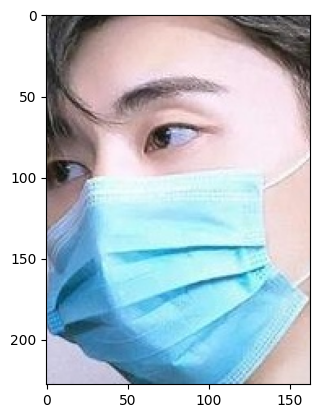

In [57]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

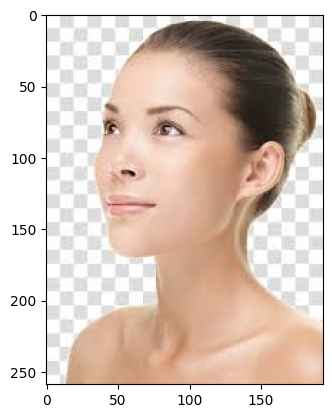

In [58]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [59]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [60]:
type(data)

list

In [61]:
len(data)

7553

array([[[ 15,  16,  21],
        [ 51,  52,  57],
        [ 70,  71,  75],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [  4,   4,   4]],

       [[ 39,  40,  45],
        [ 58,  59,  64],
        [ 45,  46,  50],
        ...,
        [  7,   7,   7],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 53,  54,  59],
        [ 35,  36,  41],
        [ 36,  37,  41],
        ...,
        [  9,   9,   9],
        [  7,   7,   7],
        [  4,   4,   4]],

       ...,

       [[ 45,  50,  53],
        [ 42,  47,  50],
        [ 36,  41,  44],
        ...,
        [203, 162, 130],
        [202, 159, 127],
        [198, 153, 122]],

       [[ 38,  43,  46],
        [ 35,  40,  43],
        [ 32,  35,  38],
        ...,
        [203, 162, 133],
        [200, 159, 130],
        [199, 156, 127]],

       [[ 34,  39,  42],
        [ 31,  36,  39],
        [ 31,  31,  35],
        ...,
        [201, 160, 131],
        [200, 159, 130],
        [199, 158, 130]]], dtype=uint8)
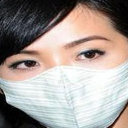

In [62]:
data[0]

In [63]:
type(data[0])

numpy.ndarray

In [64]:
data[0].shape

(128, 128, 3)

In [65]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [66]:
type(X)

numpy.ndarray

In [67]:
type(Y)

numpy.ndarray

In [68]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [69]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [72]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 83,  73,  74],
        [ 84,  75,  76],
        [ 83,  74,  74],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 82,  72,  73],
        [ 81,  73,  74],
        [ 81,  75,  74],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[ 79,  73,  73],
        [ 78,  74,  74],
        [ 79,  76,  75],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
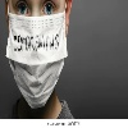

In [73]:
X_train[0]

In [74]:
X_train_scaled[0]

array([[[0.3254902 , 0.28627451, 0.29019608],
        [0.32941176, 0.29411765, 0.29803922],
        [0.3254902 , 0.29019608, 0.29019608],
        ...,
        [0.36078431, 0.36078431, 0.36078431],
        [0.36078431, 0.36078431, 0.36078431],
        [0.36078431, 0.36078431, 0.36078431]],

       [[0.32156863, 0.28235294, 0.28627451],
        [0.31764706, 0.28627451, 0.29019608],
        [0.31764706, 0.29411765, 0.29019608],
        ...,
        [0.36470588, 0.36470588, 0.36470588],
        [0.36470588, 0.36470588, 0.36470588],
        [0.36078431, 0.36078431, 0.36078431]],

       [[0.30980392, 0.28627451, 0.28627451],
        [0.30588235, 0.29019608, 0.29019608],
        [0.30980392, 0.29803922, 0.29411765],
        ...,
        [0.36470588, 0.36470588, 0.36470588],
        [0.36470588, 0.36470588, 0.36470588],
        [0.36078431, 0.36078431, 0.36078431]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Networks (CNN)**

In [75]:
import tensorflow as tf
from tensorflow import keras

In [76]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [77]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [78]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - acc: 0.6615 - loss: 0.6265 - val_acc: 0.8694 - val_loss: 0.2825
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.8854 - loss: 0.2997 - val_acc: 0.8992 - val_loss: 0.2411
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9018 - loss: 0.2672 - val_acc: 0.9074 - val_loss: 0.2385
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9166 - loss: 0.2240 - val_acc: 0.9124 - val_loss: 0.1893
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9281 - loss: 0.1926 - val_acc: 0.9190 - val_loss: 0.1908
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9436 - loss: 0.1536 - val_acc: 0.9223 - val_loss: 0.1694
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9384 - loss: 0.1456 - val_acc: 0.9140 - val_loss: 0.2165
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9479 - loss: 0.1458 - val_acc: 0.9256 - val_loss: 0.2018
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18m

**Model Evaluation**

In [79]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9459 - loss: 0.4774
Test Accuracy = 0.9477167725563049


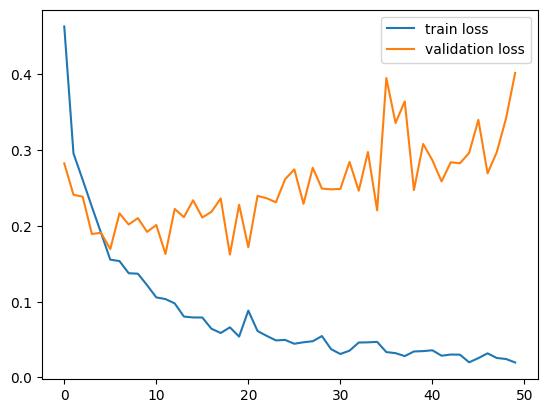

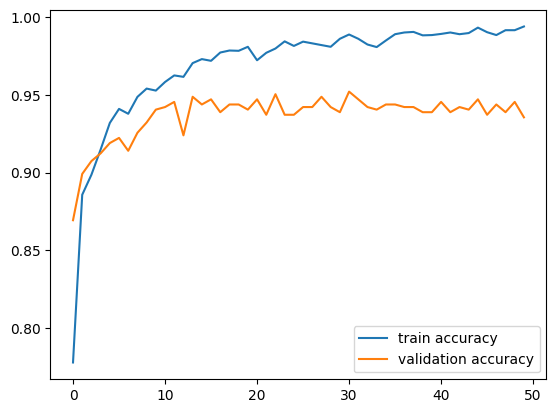

In [80]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/without_mask/without_mask_1030.jpg


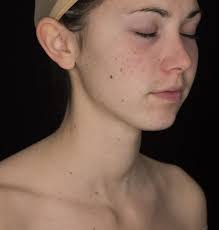

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[0.67817587 0.38960966]]
0
The person in the image is not wearing a mask


In [81]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/mask1.jpeg


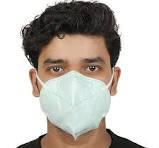

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.42162326 0.59941846]]
1
The person in the image is wearing a mask


In [84]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/mask4.jpeg


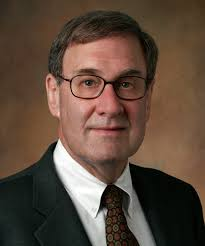

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.45633385 0.3654176 ]]
0
The person in the image is not wearing a mask


In [86]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/mask2.jpeg


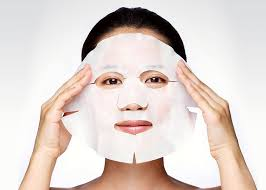

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.8246578  0.14382924]]
0
The person in the image is not wearing a mask


In [87]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')